# Extract and load data

**Concatenate all the files to make easier the extraction**

In [ ]:
# find people -type f -name "*.txt" -exec cat {} + > all_data.txt

**Extract locations and store them into a file**

In [ ]:
# import json
# import pandas as pd

# with open('../data/all_data.txt', 'r', encoding='latin-1') as file:
#     lines = file.readlines()

# latitudes = []
# longitudes = []
# altitudes = []

# for idx, line in enumerate(lines):
#     try:
#         data = json.loads(line)
#         if not isinstance(data, dict):
#             continue
#     except Exception as e:
#         continue

#     if 'Location' in data:
#         data_location = data['Location']
#         latitudes.append(data_location['Latitude'])
#         longitudes.append(data_location['Longtitude'])
#         altitudes.append(data_location['Altitude'])

# df_locations = pd.DataFrame({"Latitude": latitudes, "Longitude": longitudes, "Altitude": altitudes})
# df_locations.drop_duplicates(inplace=True)

# df_locations.to_csv("../data/locations.csv", index=False)

**Load data from the .csv file**

In [ ]:
import pandas as pd
df_locations = pd.read_csv("../data/locations.csv")

# Clustering

In [2]:
import numpy as np

def custom_distance(pt1, pt2):
    lat1, lon1 = pt1
    lat2, lon2 = pt2
    
    # Convert latitude and longitude from decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

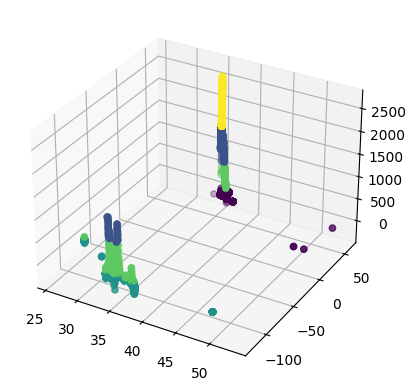

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5)
kmeans.fit(df_locations)
df_locations['Cluster'] = kmeans.predict(df_locations)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_locations['Latitude'], df_locations['Longitude'], df_locations['Altitude'], c=df_locations['Cluster'])
plt.show()

/tmp/ipykernel_15687/2832709225.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


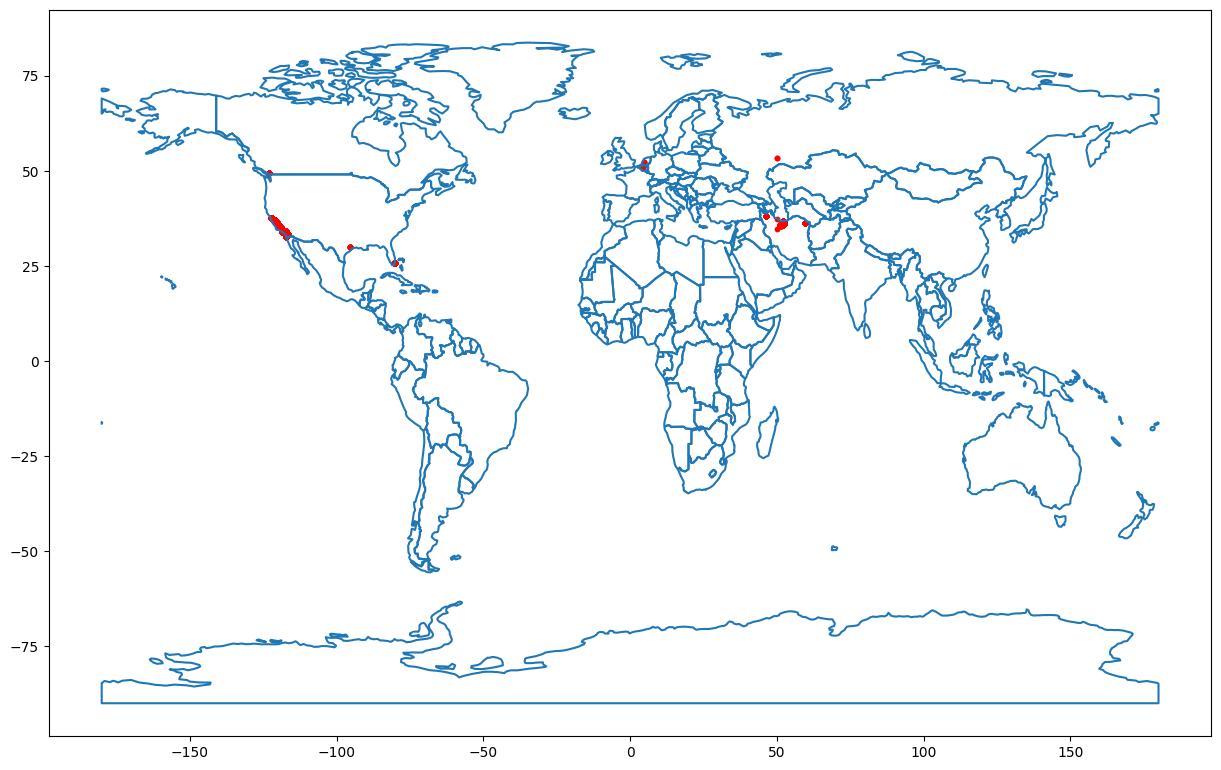

In [4]:
import geopandas as gpd
from shapely.geometry import Point

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geometry = [Point(xy) for xy in zip(df_locations['Longitude'], df_locations['Latitude'])]
gdf = gpd.GeoDataFrame(df_locations, geometry=geometry)
gdf.crs = world.crs

fig, ax = plt.subplots(figsize=(15, 15))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, color='red', markersize=10)
plt.show()